In [18]:
'''
scikit-learn                       1.1.2
pandas                             1.1.1
'''

'\nscikit-learn                       1.1.2\npandas                             1.1.1\n'

Import Data

In [1]:
import pandas as pd

train = pd.read_csv("Datasets Training.csv") # import data training
test = pd.read_csv("Datasets Testing.csv") # import data testing

print(train.shape)
print(test.shape)

(10, 104)
(3, 104)


In [5]:
# Select X & y
X_train = train.iloc[0:,:-1] # Features
y_train = train.iloc[0:,-1] # Class Target
print(y_train)

X_test = test.iloc[0:,:-1] # Features
y_test = test.iloc[0:,-1] # Class Target
print(y_test)

0    Sekar Kemuning
1    Sekar Kemuning
2    Sekar Kemuning
3      Sekar Liring
4      Sekar Liring
5      Sekar Liring
6       Sekar Duren
7       Sekar Duren
8       Sekar Duren
9       Sekar Duren
Name: Class, dtype: object
0    Sekar Kemuning
1      Sekar Liring
2       Sekar Duren
Name: Class, dtype: object


Preprocessing

In [4]:
# Normalize data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaler_train = sc.fit(X_train)
X_train_scaled = scaler_train.transform(X_train)

scaler_test = sc.fit(X_test)
X_test_scaled = scaler_test.transform(X_test)

# Encode nilai class ke dalam bentuk numeric 0 - n_classes-1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_train_preprocessed = le.transform(y_train)
y_test_preprocessed = le.transform(y_test)

print(y_train_preprocessed)
print(y_test_preprocessed)

[1 1 1 2 2 2 0 0 0 0]
[1 2 0]


### Classification

Functions

In [12]:
import os
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

def train_classification(clf, train_features, train_labels, test_features, test_labels):
    # Train Classification    
    clf.fit(train_features, train_labels) 
    test_predict = clf.predict(test_features)
    accuracy = accuracy_score(test_labels, test_predict)

    return test_labels, test_predict, accuracy

def evaluation(clf, test_labels, test_predict, filename):
    # Path untuk menyimpan grafik hasil performa klasifikasi
    path = 'Save Figure/'
    if not os.path.exists(path):
      os.makedirs(path)

    # Plot Confusion Matrix
    cm = confusion_matrix(test_labels, test_predict, labels=clf.classes_)
    plt.figure(3)
    fig = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=clf.classes_)
    fig.plot()
    plt.savefig(path+ filename + ' cm.png')
    
    # Print Classification Report
    print(classification_report(test_labels, test_predict))
    
    plt.show()

Decision Tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



<Figure size 432x288 with 0 Axes>

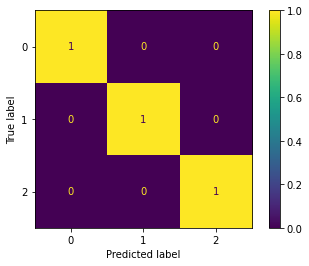

In [13]:
from sklearn.tree import DecisionTreeClassifier

clf_DT = DecisionTreeClassifier()
test_labels_DT, test_predict_DT, accuracy = train_classification(clf_DT, X_train_scaled, y_train_preprocessed, X_test_scaled, y_test_preprocessed)
evaluation(clf_DT, test_labels_DT, test_predict_DT, filename= "Decision Tree")

Support Machine Vector (SVM)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



<Figure size 432x288 with 0 Axes>

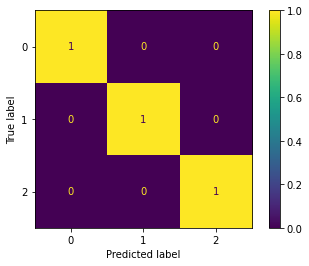

In [14]:
from sklearn.svm import SVC

clf_SVM = SVC()
test_labels_SVM, test_predict_SVM, accuracy = train_classification(clf_SVM, X_train_scaled, y_train_preprocessed, X_test_scaled, y_test_preprocessed)
evaluation(clf_SVM, test_labels_SVM, test_predict_SVM, filename= "SVM")

KNN

d:\Machine Learning\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



<Figure size 432x288 with 0 Axes>

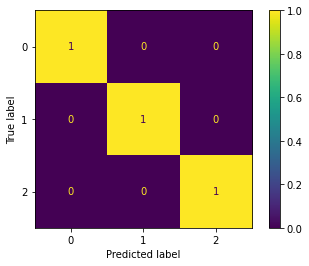

In [15]:
from sklearn.neighbors import KNeighborsClassifier

clf_kNN = KNeighborsClassifier()
test_labels_kNN, test_predict_kNN, accuracy = train_classification(clf_kNN, X_train_scaled, y_train_preprocessed, X_test_scaled, y_test_preprocessed)
evaluation(clf_kNN, test_labels_kNN, test_predict_kNN, filename= "kNN")

Naive Bayes

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         1

    accuracy                           0.67         3
   macro avg       0.50      0.67      0.56         3
weighted avg       0.50      0.67      0.56         3



d:\Machine Learning\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Machine Learning\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Machine Learning\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 432x288 with 0 Axes>

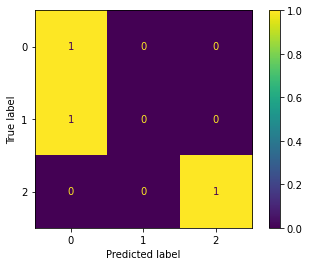

In [16]:
from sklearn.naive_bayes import GaussianNB

clf_NB = GaussianNB()
test_labels_NB, test_predict_NB, accuracy = train_classification(clf_NB, X_train_scaled, y_train_preprocessed, X_test_scaled, y_test_preprocessed)
evaluation(clf_NB, test_labels_NB, test_predict_NB, filename= "Naive Bayes")

MLP Neural Network

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



<Figure size 432x288 with 0 Axes>

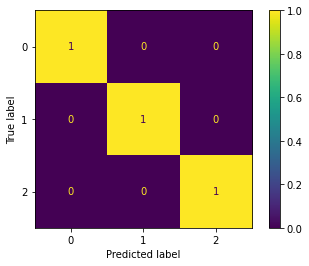

In [17]:
from sklearn.neural_network import MLPClassifier

clf_MLP = MLPClassifier()
test_labels_MLP, test_predict_MLP, accuracy = train_classification(clf_MLP, X_train_scaled, y_train_preprocessed, X_test_scaled, y_test_preprocessed)
evaluation(clf_MLP, test_labels_MLP, test_predict_MLP, filename= "MLP NN")